### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
# data.shape[0]
#data['occupation'].value_counts()
#data.query('occupation!="Farming Fishing & Forestry" & Y==1 & (Bar == "1~3")|(Bar=="4~8")|(Bar=="gt8")').shape[0]
#data['Bar'].value_counts()
#pd.set_option('display.max_columns', None)
#data['income'].value_counts()
#data['maritalStatus'].unique()
data['income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

2. Investigate the dataset for missing or problematic data.

In [93]:
#Finding null values in the column
data.columns[data.isna().any()].tolist()



3. Decide what to do about your missing data -- drop, replace, other...

In [98]:

#Filling null values in the column
data["car"].fillna("No car", inplace = True)
data["Bar"].fillna("No Bar", inplace = True)
data["CoffeeHouse"].fillna("No CoffeeHouse", inplace = True)
data["CarryAway"].fillna("No CarryAway", inplace = True)
data["RestaurantLessThan20"].fillna("No RestaurantLessThan20", inplace = True)
data["Restaurant20To50"].fillna("No Restaurant20To50", inplace = True)

#Since range is given in income, splitting into columns and $ was replaced above already with blank

data[['Lower_Value_Income','Delimeter', 'Higher_Value_Income']] = data['income'].str.split(' ', expand=True)


data['Lower_Value_Income'].unique()
data['Higher_Value_Income'].unique()
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Lower_Value_Income,Delimeter,Higher_Value_Income
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,1,$37500,-,$49999
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,0,$37500,-,$49999
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,1,$37500,-,$49999
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,$37500,-,$49999
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,$37500,-,$49999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,1~3,1,0,0,1,0,1,$75000,-,$87499
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,1~3,1,0,0,0,1,1,$75000,-,$87499
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,1~3,1,0,0,1,0,0,$75000,-,$87499
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,1~3,1,1,1,0,1,0,$75000,-,$87499


4. What proportion of the total observations chose to accept the coupon? 



In [22]:
#print(data['Y'])
total = data.shape[0]
coupon_acceptance_proportion = (data['Y'].sum()/total) * 100
print(coupon_acceptance_proportion)

56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

<Axes: >

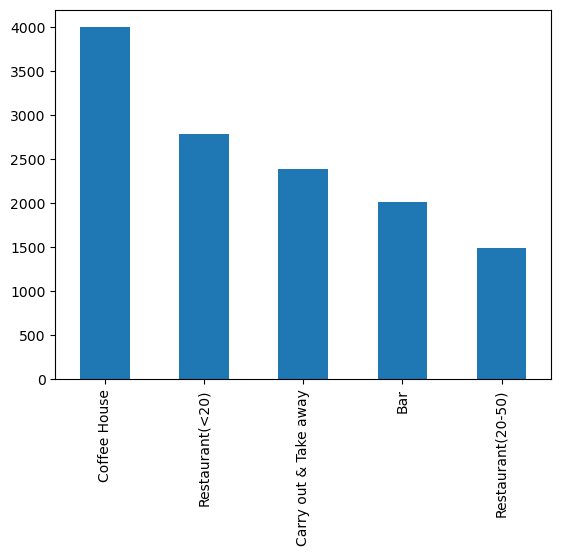

In [17]:
#The most coffee house coupon were offered among other coupon types like bar, cheap restaurant, restaurant 20-50,carry out & take away
data['coupon'].value_counts().plot(kind="bar")

<Axes: >

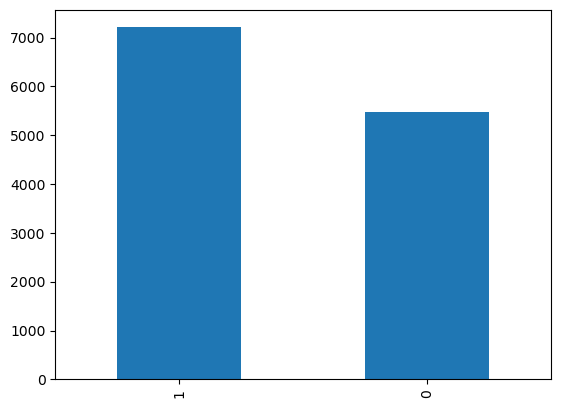

In [185]:
data['Y'].value_counts().plot(kind="bar")
#It looks like people accepted coupons are more than people did not

6. Use a histogram to visualize the temperature column.

array([[<Axes: title={'center': 'temperature'}>]], dtype=object)

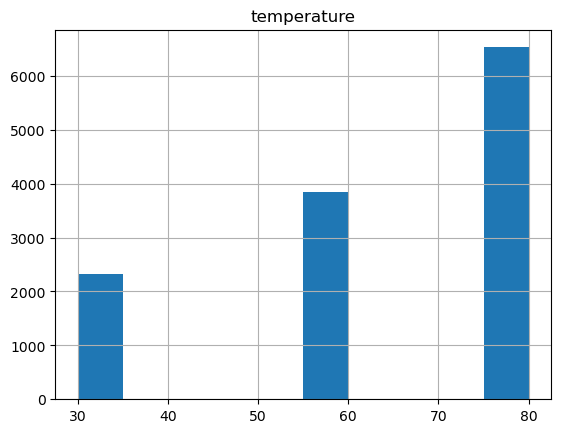

In [26]:

# Show plot
#plt.hist(data['temperature'], edgecolor = 'black', bins = 10)
#plt.show()
#data['temperature'].value_counts()
data.hist(column='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [65]:
df = data.query("coupon == 'Bar'")
df


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid,Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [35]:
#data['coupon'].value_counts()
total =df.shape[0]
bar_acceptance_proportion = (len(df.query("Y==1")))
print("The total offered bar coupons, the accepted coupon is",bar_acceptance_proportion,"and percentage is: ", (bar_acceptance_proportion/total)*100)

total1 = data.shape[0]
bar_acceptance_outofall = (len(data.query('(Y==1)&(coupon=="Bar")')))
print("Out of all coupons offered, the accepted",bar_acceptance_outofall,"and percentage of bar coupon is: ",(bar_acceptance_outofall/total1)*100)

The total offered bar coupons, the accepted coupon is 827 and percentage is:  41.00148735746158
Out of all coupons offered, the accepted 827 and percentage of bar coupon is:  6.5200252286345


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [49]:
#data['Bar'].unique()
#data["Bar"].value_counts().to_frame()
total = df.shape[0]
Bar_three_less = df.query('((Bar=="less1")| (Bar == "1~3")) & (Y==1)').shape[0]
print("People who were offered and accepted bar coupons and went 3 or less times to bar: ", Bar_three_less)
print("The percentage is against people were offered bar coupons: ", (Bar_three_less / total) * 100)


Bar_three_more = df.query('((Bar=="4~8")|(Bar=="gt8"))&(Y==1)').shape[0]
print("People who were offered and accepted BAR coupons who went more than 3 times: ",Bar_three_more)
print("The percentage is against people were offered bar coupons: ", (Bar_three_more/total) * 100)

#There are also people who were offered other coupons and accepted, but went to bar.I am excluding those cases here.

People who were offered and accepted bar coupons and went 3 or less times to bar:  510
The percentage is against people were offered bar coupons:  25.28507684680218
People who were offered and accepted BAR coupons who went more than 3 times:  153
The percentage is against people were offered bar coupons:  7.585523054040655


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [55]:
#It doesn't say anything about time frame if data is of one month or year so I am assuming people going to bar is the data of 1 month
total = df.shape[0]

#Bar_driver_25years_more_accepted =df.query('((Bar == "1~3")| (Bar == "4~8")|(Bar=="gt8")) & (Y==1) & ((age == "26")|(age=="31")|(age=="50plus")|(age=="36")|(age=="41")|(age=="46"))').shape[0]

Bar_driver_25years_more_accepted = df.query('age in ("26", "31", "31", "41", "50plus", "46")').query('Bar in ("1~3", "4~8", "gt8")').query('Y==1')

print("People who accepted coupons and more than 25 years and went to bar more than once a month: ", len(Bar_driver_25years_more_accepted))
print((len(Bar_driver_25years_more_accepted)/total ) * 100)

People who accepted coupons and more than 25 years and went to bar more than once a month:  272
13.485374318294497


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [62]:
#This process is used for people offered bar coupons and accepted:
total = df.shape[0]
data.replace('Kid(s)','Kid',inplace=True)

pass_occu_accepted = df.query('((Bar == "1~3")| (Bar == "4~8")|(Bar=="gt8"))&(passanger != "Kid") & (occupation != "Farming Fishing & Forestry") & (Y==1)').shape[0]
print("People who were offered and accepted bar coupons, went to bar more than once without kid and not with farming fishing forestry occupation: ", (pass_occu/total) * 100)


People who were offered and accepted bar coupons, went to bar more than once without kid and not with farming fishing forestry occupation:  9.221616261774914


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [115]:
#Assuming not widowed as partner
df_total = df.shape[0]
total = data.shape[0]
#data['passanger'].value_counts()

pass_kid_wid_accepted_1 = df.query('((Bar == "1~3")| (Bar == "4~8")|(Bar=="gt8")) and (passanger !="Kid") and (maritalStatus != "Widowed") and (Y == 1)').shape[0]
print("People who were not widowed , accepted coupons went to bar more than once without kid: ", (pass_kid_wid_accepted_1/df_total) * 100)

#the below code is because of interpretation that passanger is not kid or widowed, which means passanger is a partner
pass_kid_wid_accepted = df.query('((Bar == "1~3")| (Bar == "4~8")|(Bar=="gt8"))&(passanger != "Kid")&(passanger == "Partner") & (Y == 1)').shape[0]
print("People who accepted coupons went to bar more than once without kid and not widowed: ", (pass_kid_wid_accepted/df_total) * 100)

pass_age30_accepted = df.query('((Bar == "1~3")| (Bar == "4~8")|(Bar=="gt8"))&((age == "26")|(age == "21")|(age=="below21")) & (Y == 1)').shape[0]
print("People who accepted coupons went to bar more than once and less than 30 years: ", (pass_age30_accepted/df_total) * 100)

cheap_rest_income = data.query('Y==1').query('RestaurantLessThan20 in ("grt8","4~8")').query('income in("$25000 - $37499","$12500 - $24999","$37500 - $49999","Less than $12500")').shape[0]

print("People who went cheap restaurant more than 4 time with less than 50K and accepted coupons: ", cheap_rest_income, "and percentage is : ",(cheap_rest_income/total) * 100)

People who were not widowed , accepted coupons went to bar more than once without kid:  19.484382746653445
People who accepted coupons went to bar more than once without kid and not widowed:  2.2310361923648983
People who accepted coupons went to bar more than once and less than 30 years:  12.345066931085771
People who went cheap restaurant more than 4 time with less than 50K:  924 and percentage is :  7.28476821192053


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

People accepted bar coupons:  827
People accepted coffeehouse coupons:  1995
People accepted carraway coupons:  1760
People accepted cheap restaurant coupons:  1970
People accepted 20To50 restaurant coupons:  658


<BarContainer object of 5 artists>

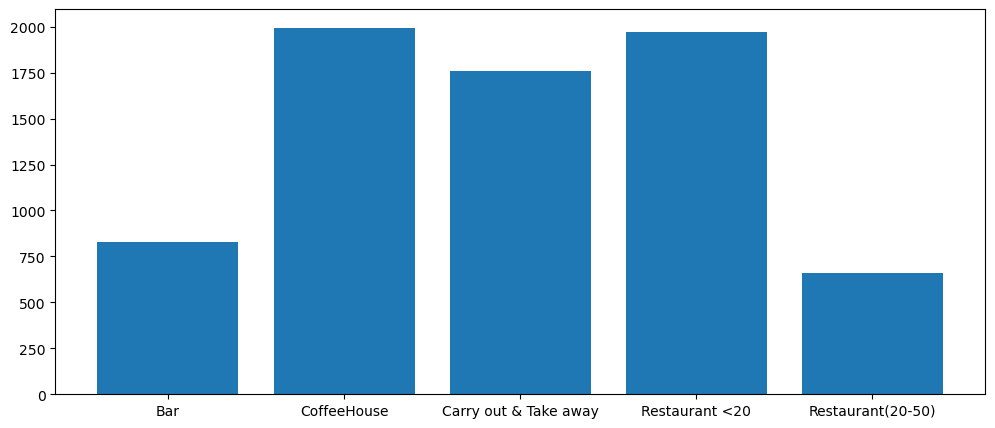

In [116]:
bar_accepted_coupon = data.query('(Y==1) & (coupon=="Bar")')
print("People accepted bar coupons: ", bar_accepted_coupon.shape[0])

coffeehouse_coupon = data.query('(Y==1) & (coupon=="Coffee House")')
print("People accepted coffeehouse coupons: ",coffeehouse_coupon.shape[0])

CarryAway_coupon = data.query('(Y==1) & (coupon=="Carry out & Take away")')
print("People accepted carraway coupons: ",CarryAway_coupon.shape[0])

RestaurantLessThan20_coupon = data.query('(Y==1) & (coupon=="Restaurant(<20)")')
print("People accepted cheap restaurant coupons: ",RestaurantLessThan20_coupon.shape[0])

Restaurant20To50_coupon = data.query('(Y==1) & (coupon=="Restaurant(20-50)")')
print("People accepted 20To50 restaurant coupons: ",Restaurant20To50_coupon.shape[0])

x=["Bar","CoffeeHouse","Carry out & Take away","Restaurant <20","Restaurant(20-50)"]
y=[bar_accepted_coupon.shape[0],coffeehouse_coupon.shape[0],CarryAway_coupon.shape[0],RestaurantLessThan20_coupon.shape[0],Restaurant20To50_coupon.shape[0]]
plt.figure(figsize=(12,5))
plt.bar(x,y)
   #data["coupon"].unique()

1190
2001
633
816
834


<BarContainer object of 5 artists>

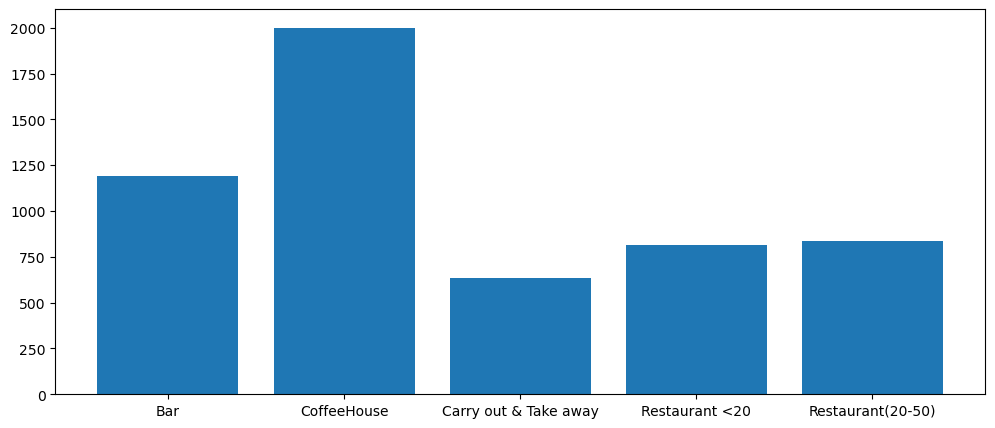

In [29]:
bar_accepted_coupon = data.query('(Y==0) & (coupon=="Bar")')
print(bar_accepted_coupon.shape[0])

coffeehouse_coupon = data.query('(Y==0) & (coupon=="Coffee House")')
print(coffeehouse_coupon.shape[0])

CarryAway_coupon = data.query('(Y==0) & (coupon=="Carry out & Take away")')
print(CarryAway_coupon.shape[0])

RestaurantLessThan20_coupon = data.query('(Y==0) & (coupon=="Restaurant(<20)")')
print(RestaurantLessThan20_coupon.shape[0])

Restaurant20To50_coupon = data.query('(Y==0) & (coupon=="Restaurant(20-50)")')
print(Restaurant20To50_coupon.shape[0])

x=["Bar","CoffeeHouse","Carry out & Take away","Restaurant <20","Restaurant(20-50)"]
y=[bar_accepted_coupon.shape[0],coffeehouse_coupon.shape[0],CarryAway_coupon.shape[0],RestaurantLessThan20_coupon.shape[0],Restaurant20To50_coupon.shape[0]]
plt.figure(figsize=(12,5))
plt.bar(x,y)

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

3841
2221
508
640


Text(0.5, 1.0, 'People accepted coupon most likely go with passenger')

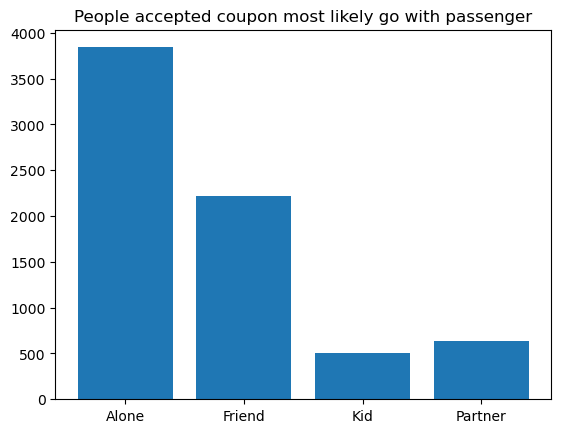

In [198]:
total = data.shape[0]
data['passanger'].unique()
#data.replace('Friend(s)','Friend',inplace=True)
alone_pass = data.query('passanger=="Alone" & Y==1').shape[0]
print(alone_pass)

friend_pass = data.query('passanger=="Friend" & Y==1').shape[0]
print(friend_pass)

kid_pass = data.query('passanger=="Kid" & Y==1').shape[0]
print(kid_pass)

partner_pass = data.query('passanger=="Partner" & Y==1').shape[0]
print(partner_pass)

x = ['Alone','Friend','Kid','Partner']
y = [3841,2221,508,640]
plt.bar(x, y)
plt.title("People accepted coupon most likely go with passenger")


In [ ]:
It looks like there are more people who were offered Bar coupon but did not accept it than people who were offered and accepted.
People went to Bar alone than they with someone. People going to Bar with Kid are the least.